In [2]:
import pandas as pd

consumption = pd.read_csv("powerconsumption.csv")

consumption.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [20]:
# Now use 'usecols' to pass in only the 4 columns we want to work with (index)
# and create 3 new columns, total_conumption, hour & day_of_week

consumption = pd.read_csv(
    "powerconsumption.csv"
    ,usecols=[0,6,7,8]
    ,parse_dates=[0]
).assign(
    total_consumption= lambda x: x["PowerConsumption_Zone1"] + x["PowerConsumption_Zone2"] + x["PowerConsumption_Zone3"]  
    ,hour= lambda x: x["Datetime"].dt.hour
    ,day_of_week= lambda x: x["Datetime"].dt.dayofweek
    )

consumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


In [47]:
# to resample the data you must set the index to the Datetime col
# round output to 2 decimals
import numpy as np

np.round(consumption
     .set_index("Datetime")
     .resample("h")
     ["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]
     .mean()
     .loc["2017-01"]
    ,decimals=2
 )





,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,
2017-01-01 00:00:00,29197.97,18026.75,19252.05
2017-01-01 01:00:00,24657.22,16078.42,17042.89
2017-01-01 02:00:00,22083.04,14330.70,15676.14
2017-01-01 03:00:00,20811.14,13219.45,14883.86
2017-01-01 04:00:00,20475.95,12921.58,14317.11
...,...,...,...
2017-01-31 19:00:00,42843.54,25438.30,25731.08
2017-01-31 20:00:00,43023.80,25429.79,26003.86
2017-01-31 21:00:00,41560.51,25259.57,25527.71


<Axes: title={'center': 'Hourly Electricity Consumption by Zone - January 2017'}, xlabel='Date', ylabel='Consumption (kWh)'>

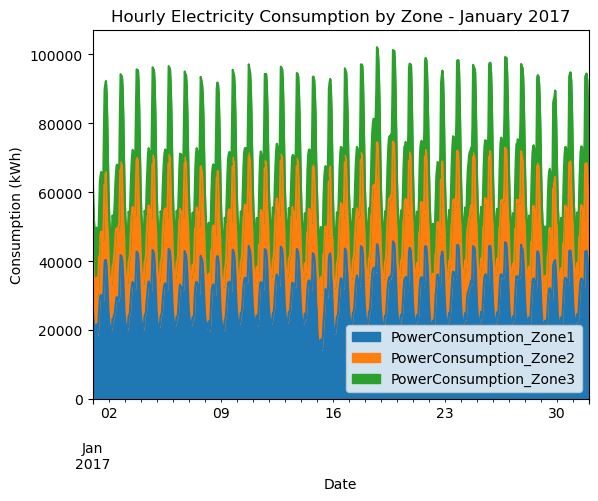

In [65]:
#plot the results & despine (remove top & right side border)

(consumption
     .set_index("Datetime")
     .resample("h")
     ["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]
     .mean()
     .loc["2017-01"]
     .plot
     .area(
         title="Hourly Electricity Consumption by Zone - January 2017"
         ,xlabel="Date"
         ,ylabel="Consumption (kWh)"
     )
 )



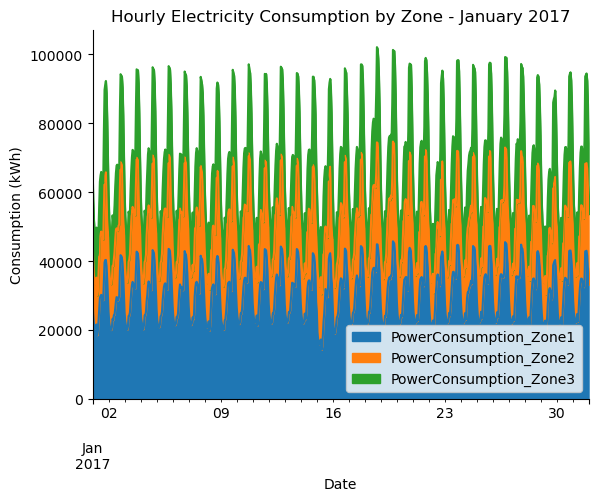

In [117]:
import seaborn as sns

(consumption
     .set_index("Datetime")
     .resample("h")
     ["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]
     .mean()
     .loc["2017-01"]
     .plot
     .area(
         title="Hourly Electricity Consumption by Zone - January 2017"
         ,xlabel="Date"
         ,ylabel="Consumption (kWh)"
     )
 )


sns.despine()

In [67]:
consumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


In [71]:
# create a pivot table where the rows are the day of the week, 
# the columns are the hour of day and the cells represent the average value of total_consumption

consumption.pivot_table(
        index="day_of_week"
        ,columns="hour"
        ,values="total_consumption"
        , aggfunc="mean"
)



hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,67817.926234,61755.422717,58647.360270,56399.125350,54823.472531,51680.112788,50810.531813,52647.477122,58153.995604,64829.891067,...,76295.125575,74951.160542,73672.590199,77737.724117,87015.319529,96344.104726,98636.766753,94795.229937,87444.628027,77141.248435
1,67935.356547,61868.544847,58801.200586,56642.907327,55088.146346,52165.725002,51320.086009,53314.431143,58788.751316,65473.069281,...,76564.586378,75151.608847,73866.089284,78034.431306,87425.955170,96812.639776,98951.522986,95247.295786,88105.205865,77583.710692
2,68239.842528,62022.724317,58798.761412,56626.703787,55114.497390,52157.866552,51411.322040,53186.989913,58830.511611,65583.730610,...,77084.718564,75799.737721,74690.144168,78963.032971,88010.877872,97121.892997,99259.106506,95347.105487,87966.060059,77526.249785
3,68293.632675,62187.544469,59063.328906,56958.133058,55465.004964,52336.590999,51408.387710,53305.035278,58985.960718,65850.016097,...,77129.099508,76024.015184,74771.523732,78859.415340,88130.713827,97361.509809,99639.276059,95745.056611,88461.996304,78369.942328
4,68959.251459,62533.960861,59152.040758,56825.429786,55296.351259,52178.788896,51156.640309,52771.135698,58250.443622,65179.083324,...,74344.497887,73169.524043,72295.790052,76172.341277,85512.967870,94802.624915,97380.905756,94232.932202,87846.655100,78259.646904
5,68991.576226,62628.416936,59321.825090,56745.339022,54816.778024,51275.831269,49144.134609,49769.161118,55718.168776,63423.248858,...,74654.603723,72910.123153,71972.130743,75921.019762,85309.097439,94902.067927,96852.132434,93754.497597,88284.551471,79287.720731
6,69728.136464,63113.302575,59243.071267,56207.553656,53896.627602,49677.139543,46078.167596,44983.099866,49619.256706,56571.380742,...,70039.555630,68585.463342,67570.378727,71844.793038,81580.676389,92171.105678,95540.060279,93301.028513,87069.268851,77031.733676


In [113]:
day_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

consumption["day_name"] = pd.Categorical(consumption["Datetime"].dt.day_name(), categories=day_of_week)

[Text(0.5, 1.0, 'Power Consumption by Day of Week and Hour')]

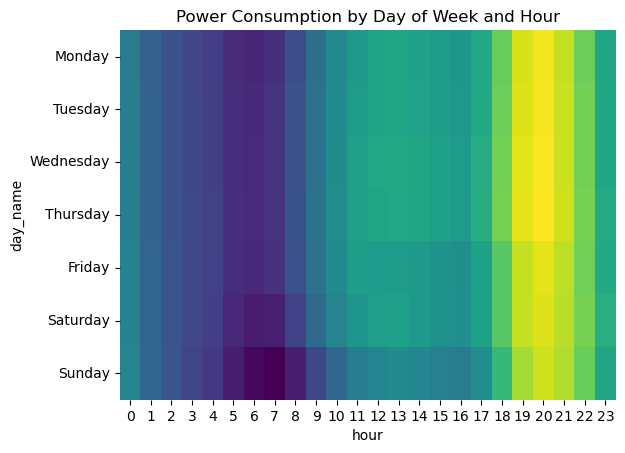

In [115]:
#sns.color_palette("viridis", as_cmap=True)


sns.heatmap(
    consumption.pivot_table(
        index="day_name"
        ,columns="hour"
        ,values="total_consumption"
        , aggfunc="mean"
        ),
        cbar=None,
        cmap="viridis"
    ).set(title="Power Consumption by Day of Week and Hour")

